In [2]:
import cv2 
import numpy as np 
from sklearn.cluster import KMeans 
import pandas as pd
import matplotlib.pyplot as plt 

(np.float64(-0.5), np.float64(1018.5), np.float64(1190.5), np.float64(-0.5))

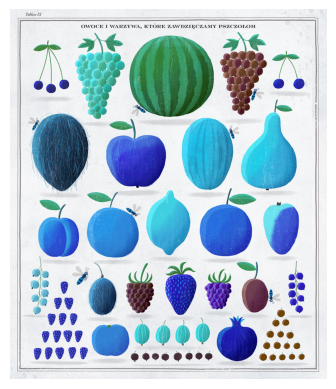

In [3]:
# Wczytanie obraz i konwersja przestrzeni kolorów 
image_path = 'owoce.png' 
image = cv2.imread(image_path) 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image)
plt.axis('off')

In [4]:
# Przekształcenie obrazu do jednowymiarowej tablicy (macierz pikseli) 
pixels = image_rgb.reshape(-1, 3) 
df = pd.DataFrame(pixels)

X = df.values[:,0:3]

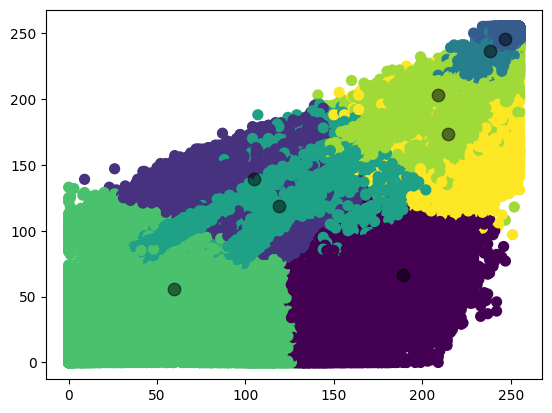

In [5]:
# Grupowanie kolorów z użyciem KMeans 
num_clusters = 8 # Liczba klastrów (dominujących kolorów), którą można zoptymalizować 

kmeans = KMeans(num_clusters, n_init = 10, init='random', random_state=42)
kmeans.fit(X)

y_kmeans = kmeans.labels_
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=80, alpha=0.5)
plt.show()

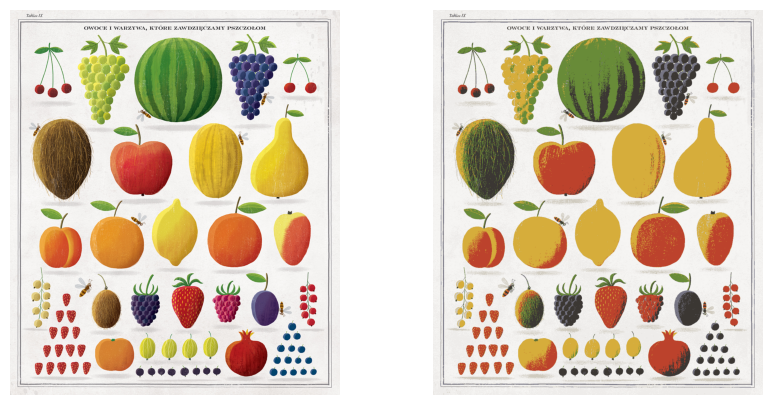

In [6]:
# kolory dominujące
X_dominant = kmeans.cluster_centers_[y_kmeans]

# rekonstrukcja 
dominant_pixels = np.clip(X_dominant, 0, 255).astype(np.uint8)
dominant_image = dominant_pixels.reshape(image_rgb.shape)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(dominant_image)
plt.axis('off')
plt.show()

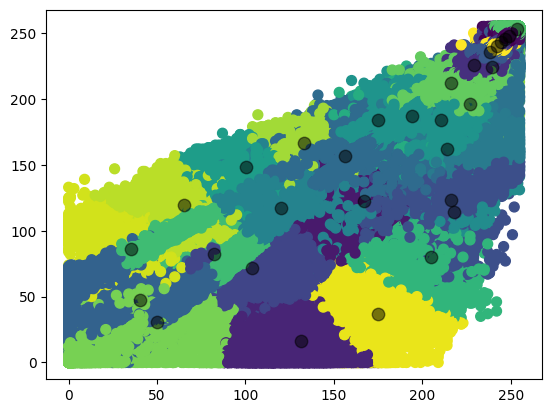

In [11]:
num_clusters = 30 # Liczba klastrów (dominujących kolorów), którą można zoptymalizować 

kmeans = KMeans(num_clusters, n_init = 10, init='random', random_state=42)
kmeans.fit(X)

y_kmeans = kmeans.labels_
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=80, alpha=0.5)
plt.show()

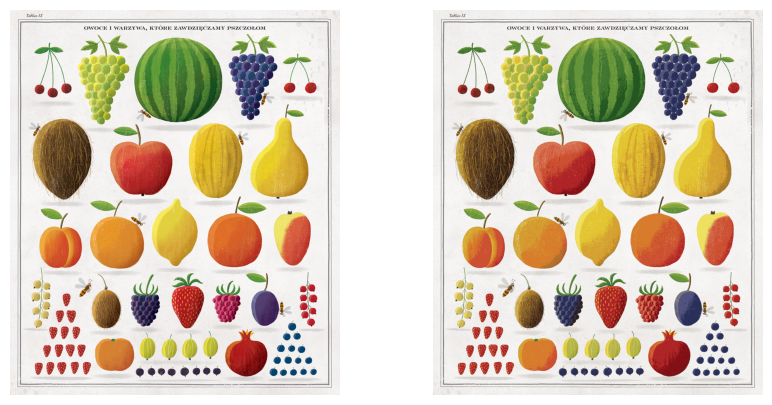

In [12]:
# kolory dominujące
X_dominant = kmeans.cluster_centers_[y_kmeans]

# rekonstrukcja 
dominant_pixels = np.clip(X_dominant, 0, 255).astype(np.uint8)
dominant_image = dominant_pixels.reshape(image_rgb.shape)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(dominant_image)
plt.axis('off')
plt.show()